# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет
1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

Я выбрал последний датасет, давайте загрузим его в колаб:

In [ ]:
# We're getting kaggle key from Drive here
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/.system/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d thunderz/anime-dataset
!unzip -o /content/anime-dataset.zip

 97% 27.0M/27.9M [00:00<00:00, 25.3MB/s]
100% 27.9M/27.9M [00:00<00:00, 47.3MB/s]
Archive:  /content/anime-dataset.zip
  inflating: MAL_genres.pickle       
  inflating: anime_data.csv          
  inflating: user_data.csv           


Отлично, теперь приступим к выполнению задания.

In [ ]:
import numpy as np
import pandas as pd
import math, random, json, ast
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/user_data.csv')
print(df.shape)
df.head()

(2195, 20)


,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
0,-0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,0,477,3,NaN,NaN,2017-09-19T00:00:00+00:00,2020-09-25 11:03:22+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '..."
1,-Droid-,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,53,2271,7,1930-01-07T00:00:00+00:00,Male,2013-09-07T00:00:00+00:00,2020-09-17 21:07:00+00:00,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '..."
2,-Hentai,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05T00:00:00+00:00,Male,2014-05-19T00:00:00+00:00,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '..."
3,-Jens,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,0,518,5,NaN,NaN,2020-06-11T00:00:00+00:00,2020-09-24 14:06:00+00:00,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com..."
4,-Kano,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,2,325,5,NaN,NaN,2015-08-12T00:00:00+00:00,2020-09-26 01:29:32+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co..."


Посмотрим на распределение количества просматривыемых на данный момент аниме, для удобства восприятия включим логарифмическую шкалу:

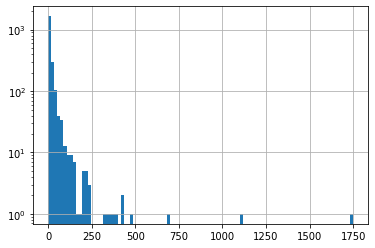

In [ ]:
df['watching'].hist(bins=100, log=True)

Сразу выдвинем первую гипотезу - чем больше эпизодов суммарно посмотрел человек, тем ниже их среднее качество. Попробуем проверить эту закономерность, построив scatter-plot:

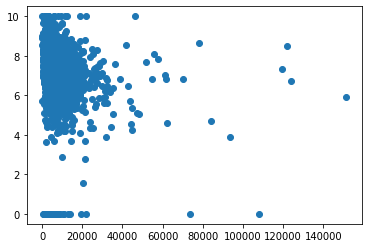

In [ ]:
plt.scatter(df['episodes_watched'], df['mean_score'])
plt.show()

Можно заметить, что есть достаточно большое количество людей, средний рейтинг просмотренного аниме у которых равен нулю. Давайте выкинем этих людей из таблицы, потому что они портят общие наблюдения:

In [ ]:
df.drop(df.index[df['mean_score'] == 0], inplace=True)

И повторим построение графика:

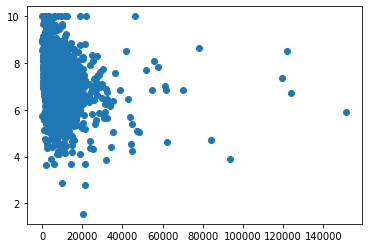

In [ ]:
plt.scatter(df['episodes_watched'], df['mean_score'])
plt.show()

Полученный график, хоть и даёт нам представление о том, что гипотеза похожа на правду, недостаточно качественно отображает информацию из-за наличия небольшого количества outlier-ов, которые просмотрели невероятное количество эпизодов. Попробуем построить аналогичный график на $90\%$ средних пользователей: 

In [ ]:
hyp1_df = df.sort_values('episodes_watched').iloc[int(.05 * df.shape[0]):int(.95 * df.shape[0])]

print(hyp1_df.shape)
hyp1_df.head()

(1926, 20)


,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
1416,ThatWhiteHand,"[{'mal_id': 37587, 'title': 'Lapis Re:LiGHTs'}]","[{'title': 'Angel Beats!', 'mal_id': 6547, 'sc...",61,23.3,8,1359,7.34,2,1,0,72,0,NaN,Male,2019-11-23T00:00:00+00:00,2020-09-22 16:06:14+00:00,Florida,"{'anime': [{'mal_id': 26243, 'title': 'Owari n...","{'Action': 27, 'Adventure': 9, 'Cars': 1, 'Com..."
1881,kedamoyes,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': 'Aggressive Retsuko (ONA)', 'mal_id...",82,23.0,9,1359,7.76,31,42,1,164,0,NaN,Male,2017-09-10T00:00:00+00:00,2020-09-21 21:13:00+00:00,NaN,"{'anime': [{'mal_id': 440, 'title': 'Shoujo Ka...","{'Action': 38, 'Adventure': 24, 'Cars': 0, 'Co..."
1485,Unused-username1,"[{'mal_id': 7674, 'title': 'Bakuman.'}, {'mal_...","[{'title': 'Akira', 'mal_id': 47, 'score': 8, ...",76,23.6,4,1363,8.13,13,11,16,117,13,1999-02-08T00:00:00+00:00,Male,2016-07-19T00:00:00+00:00,2020-03-14 05:29:00+00:00,"Gloucestershire, England","{'anime': [{'mal_id': 1535, 'title': 'Death No...","{'Action': 43, 'Adventure': 27, 'Cars': 1, 'Co..."
741,KawaiiBerrii,"[{'mal_id': 12291, 'title': 'Acchi Kocchi (TV)...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",108,23.4,8,1378,8.59,2,79,0,203,6,1998-01-02T00:00:00+00:00,Female,2017-04-23T00:00:00+00:00,2020-07-19 15:44:00+00:00,"Wales, UK","{'anime': [], 'characters': [], 'people': []}","{'Action': 29, 'Adventure': 15, 'Cars': 0, 'Co..."
1140,PontopK,"[{'mal_id': 31964, 'title': 'Boku no Hero Acad...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",106,24.3,0,1388,7.38,0,8,0,118,4,2002-04-09T00:00:00+00:00,Male,2017-12-13T00:00:00+00:00,2020-09-19 13:52:00+00:00,"Parana, Curitiba","{'anime': [{'mal_id': 227, 'title': 'FLCL'}, {...","{'Action': 31, 'Adventure': 22, 'Cars': 0, 'Co..."


На этот раз построим на тех же двух параметрах 2d-гистограмму, с помощью которой мы сможем увидеть зависимость более наглядно:

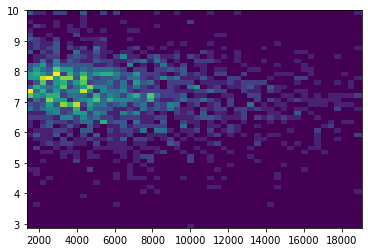

In [ ]:
plt.hist2d(hyp1_df['episodes_watched'], hyp1_df['mean_score'], bins=50)
plt.show()

С помощью этого графика уже можно понять, что гипотеза, в целом, не очень совпадает с реальностью - описанная закономерность прослеживается очень слабо.

Теперь посмотрим на то, какие в целом средние рейтинги у просматриваемых людьми тайтлов:

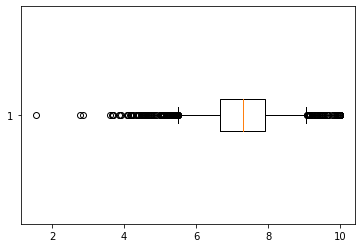

In [ ]:
plt.boxplot(df['mean_score'], vert=False, whis=.95)
plt.show()

Как можно заметить, подавляющее большинство зрителей смотрят аниме со средней оценкой около $7.5$.

Давайте теперь сделаем следующее - загрузим ещё и датасет с самими тайтлами и для каждого человека, у которого определены любимые тайтлы, узнаем их средний рейтинг, и добавим это значение в наш исходный датафрейм.

In [ ]:
anime_df = pd.read_csv('/content/anime_data.csv')

print(anime_df.shape)
anime_df.head()

(11335, 19)


,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


In [ ]:
def favoriteAnimeParse(s):
  res = ast.literal_eval(s)
  if 'anime' not in res.keys():
    return []
  return res['anime']
  
def getScoreById(id):
  tmp = anime_df['score'][anime_df.index[(anime_df['mal_id'] == id)]]
  if len(tmp) == 0:
    return None
  return tmp.iloc[0]

def mapFavToMean(arr):
  scores = list(filter(lambda x: x is not None, map(lambda fav : getScoreById(fav['mal_id']), arr)))
  return None if len(scores) == 0 else np.mean(np.array(scores))

df['fav_anime_score'] = df['favorites'].apply(favoriteAnimeParse).apply(mapFavToMean)
df.head()

,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count,fav_anime_score
0,-0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,0,477,3,NaN,NaN,2017-09-19T00:00:00+00:00,2020-09-25 11:03:22+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '...",NaN
1,-Droid-,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,53,2271,7,1930-01-07T00:00:00+00:00,Male,2013-09-07T00:00:00+00:00,2020-09-17 21:07:00+00:00,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '...",8.1000
2,-Hentai,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05T00:00:00+00:00,Male,2014-05-19T00:00:00+00:00,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '...",8.3910
3,-Jens,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,0,518,5,NaN,NaN,2020-06-11T00:00:00+00:00,2020-09-24 14:06:00+00:00,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com...",8.4125
4,-Kano,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,2,325,5,NaN,NaN,2015-08-12T00:00:00+00:00,2020-09-26 01:29:32+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co...",NaN


Оказывается, в датасете полно пропусков, поэтому получение этого столбца оказалось довольно мучительным)

Давайте сохраним новый датафрейм:

In [ ]:
df.to_csv('/content/user_data_updated.csv')

Теперь, имея этот столбец, давайте построим boxplot для новой величины:

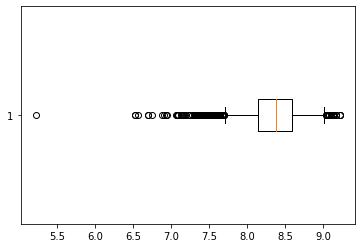

In [ ]:
plt.boxplot(df['fav_anime_score'].dropna(), vert=False, whis=0.95)
plt.show()

Как можно видеть, средний рейтинг *любимых* тайтлов у пользователей существенно выше - практически $8.5$. Давайте посмотрим теперь на scatter, показывающий соответствие между средним рейтингом просмотренного аниме и средним рейтингом любимого аниме.

Можно выдвинуть гипотезу, состоящую в том, что общая масса пользователей будет сосредоточена выше диагонали, то есть количество тех, у кого рейтинг любимого аниме ниже среднего рейтинга всех аниме, мало.

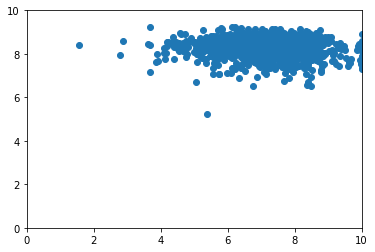

In [ ]:
hyp2_df = df[df['fav_anime_score'].notnull()]

plt.scatter(hyp2_df['mean_score'], hyp2_df['fav_anime_score'])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

Эта гипотеза в целом оправдалась, за исключением небольшого количества outlier-ов. Опять же, посмотрим на то же самое на 2d-гистограмме (ИМХО в случае с однородным датасетом они строго информативнее scatter-ов):

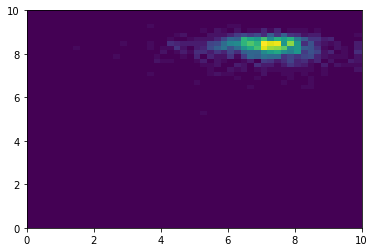

In [ ]:
plt.hist2d(hyp2_df['mean_score'], hyp2_df['fav_anime_score'], bins=50, range=((0, 10), (0, 10)))
plt.show()

Тут это гораздо более четко прослеживается.

Напоследок, раз уж мы не сделали этого раньше, построим обычный график, показывающий количество пользователей, зарегистрированных на MAL по годам:

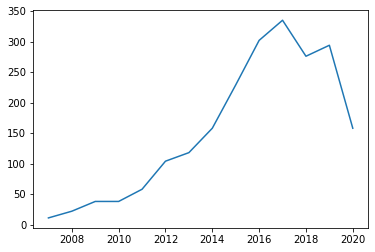

In [ ]:
regs = df['joined'].dropna().apply(lambda s : int(s[:4])).to_numpy()
mn, mx = regs.min(), regs.max() + 1
counts = [0 for x in range(mn, mx)]
years = [x for x in range(mn, mx)]

for year in regs:
  counts[year - mn] += 1

plt.plot(years, counts)
plt.show()

Датасет был собран в 2020 году, так что не отражает полностью количество зарегистрировавшихся в этот год пользователей, однако восходящая тенденция до 2017 года очевидна, а вот дальше, видимо, число новых любителей аниме поубавилось.

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [ ]:
import math, random
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

Чтобы результаты интерполяции были хоть чуточку адекватными, давайте сгенерируем входные так: сначала возьмём случайную достаточно пологую прямую, а затем выберем точки, отклоняющиеся от неё на нормально распределённую случайную величину на равных интервалах по оси $x$.

In [ ]:
k, shift = np.random.uniform(low=0.5, high=1.5, size=2)

pts_cnt = 10
pts = np.column_stack([np.linspace(0, 10, pts_cnt, endpoint=True), np.linspace(0, 10, pts_cnt, endpoint=True) * k + shift + np.random.normal(size=pts_cnt)])

Посмотрим на полученные данные:

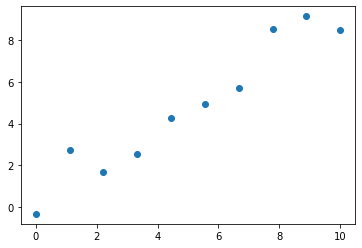

In [ ]:
plt.scatter(pts[:,0], pts[:,1])
plt.show()

В качестве готового интерполятора я решил взять [`AkimaInterpolator`](https://github.com/scipy/scipy/blob/ccd70986a5b81d27f636dc9058fc50ccb6d9acfa/scipy/interpolate/_cubic.py#L364):

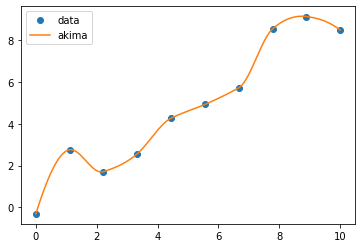

In [ ]:
xarg = np.linspace(0, 10, 150, endpoint=True)
akima = scipy.interpolate.Akima1DInterpolator(pts[:,0], pts[:,1])

plt.plot(pts[:,0], pts[:,1], 'o', xarg, akima(xarg), '-')
plt.legend(['data', 'akima'], loc='best')
plt.show()

Теперь давайте сделаем что-нибудь своё, а конкретно аналог [`интерполяции Лагранжа`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange).

In [ ]:
class Polynom:
  def __init__(self, coefs):
    self.coefs = np.array(coefs)
  
  def __mul__(self, other):
    coefs = np.zeros((len(self.coefs) + len(other.coefs) - 1))
    for i in range(len(self.coefs)):
      for j in range(len(other.coefs)):
        coefs[i + j] += self.coefs[i] * other.coefs[j]
    return Polynom(coefs)
  

  def __add__(self, other):
    return Polynom(self.coefs + other.coefs)

  def __call__(self, x):
    res, pw = 0, 1
    for c in self.coefs:
      res, pw = res + c * pw, pw * x
    return res

class Lagrange:
  def __calculate_prefix_polynoms(self, points):
    prefPoly = [Polynom([1])]
    for [x, y] in points:
      prefPoly.append(prefPoly[-1] * Polynom([-x, 1]))
    prefPoly.pop()
    return prefPoly

  def __init__(self, x, y):
    if len(x) != len(y):
        raise ValueError("x and y have different shapes")
    
    n = len(x)
    points = list(zip(x, y))

    pref_poly = self.__calculate_prefix_polynoms(points)
    
    points.reverse()
    suff_poly = self.__calculate_prefix_polynoms(points)
    suff_poly.reverse()
    points.reverse()

    result = Polynom([0])
    for i in range(len(points)):
      poly_i = pref_poly[i] * suff_poly[i]
      poly_i.coefs *= y[i] / pref_poly[i](x[i]) / suff_poly[i](x[i])
      result = result + poly_i
    self.poly_callable = np.vectorize(result)

  def __call__(self, x):
    return self.poly_callable(x)

А теперь применим его и нарисуем:

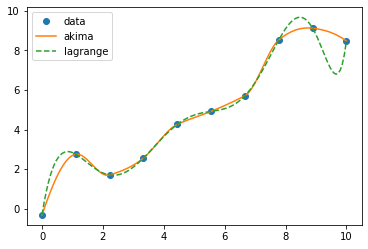

In [ ]:
lg = Lagrange(pts[:,0], pts[:,1])

plt.plot(pts[:,0], pts[:,1], 'o', xarg, akima(xarg), '-', xarg, lg(xarg), '--')
plt.legend(['data', 'akima', 'lagrange'], loc='best')
plt.show()

Как можно видеть, алгоритм Акимы получает более гладкую и аккуратную функцию. Оба метода, как несложно понять, будут проходить через **все** точки датасета, что не позволяет оценивать различия в их качестве в этом смысле, однако достаточно ясно, что Лагранж генерирует довольно паршивую функцию - она имеет существенно больший разброс значений, но, в свою очередь, является бесконечно гладкой.

In [ ]:
def sq_diff(f):
  return np.sum(np.abs(pts[:,1] - f(pts[:,0])) ** 2)

sq_diff(akima), sq_diff(lg)

(0.0, 4.948357034993033e-19)

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


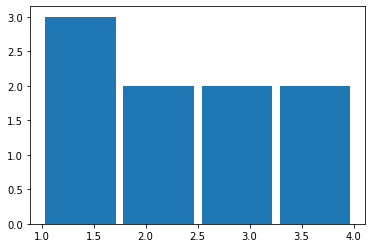

In [ ]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, _ = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [ ]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int, draw: bool = False) -> Tuple[List[int], List[float]]:
    if bins <= 0:
      raise ValueError('bins must be positive')
    if len(array) == 0:
      return [0] * bins, [0.] * bins
    if len(array) == 1:
      return [1] + [0] * (bins - 1), [float(array[0])] * (bins)
    
    if not isinstance(array, np.ndarray):
      array = np.array(array, dtype=float)

    mn, mx = np.amin(array), np.amax(array)

    res_val = np.zeros((bins + 1), dtype=int)
    res_pos = np.linspace(mn, mx, bins + 1, dtype=float)

    width = (mx - mn) / bins

    for i in np.nditer(np.int_((array - mn) / width)):
      res_val[i] += 1

    res_val[-2] += res_val[-1]

    if draw:
      plt.bar(res_pos[:-1], res_val[:-1], align='edge')

    return res_val[:-1], res_pos

Сгенерируем себе нормально распределённый датасет:

In [ ]:
data = np.random.normal(size=1_000)

Посмотрим, как выглядит оригинальная гистограмма:

(array([  9.,  21.,  58., 103., 183., 208., 211., 120.,  58.,  29.]),
 array([-3.0316361 , -2.48540059, -1.93916508, -1.39292957, -0.84669407,
        -0.30045856,  0.24577695,  0.79201246,  1.33824797,  1.88448347,
         2.43071898]),
 <a list of 10 Patch objects>)

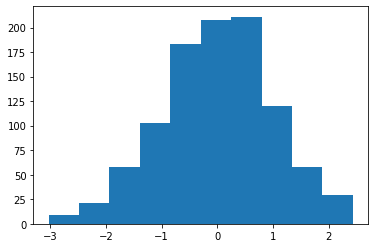

In [ ]:
plt.hist(data, bins=10)

А теперь как самописная:

(array([  9,  21,  58, 103, 183, 208, 211, 120,  58,  29]),
 array([-3.0316361 , -2.48540059, -1.93916508, -1.39292957, -0.84669407,
        -0.30045856,  0.24577695,  0.79201246,  1.33824797,  1.88448347,
         2.43071898]))

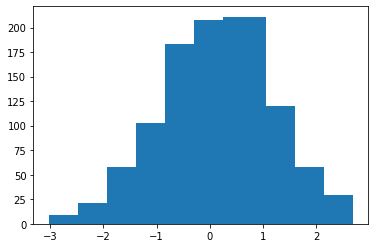

In [ ]:
fast_hist(data, 10, draw=True)

Они совпадают.
Давайте теперь проверим быстродействие:

In [ ]:
data = np.random.exponential(size=100)

The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 6.85 ms per loop


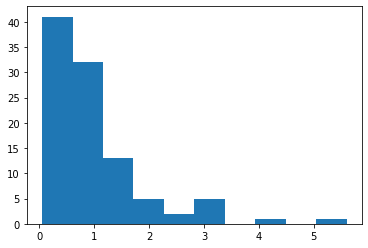

In [ ]:
%timeit plt.hist(data, bins=10) 

In [ ]:
%timeit fast_hist(data, 10)

10000 loops, best of 5: 139 µs per loop


Хочется заметить, что `fast_hist` обгоняет `plt.hist` только на маленьких наборах данных, на больших же наблюдается обратный эффект:

1 loop, best of 5: 202 ms per loop
1 loop, best of 5: 768 ms per loop


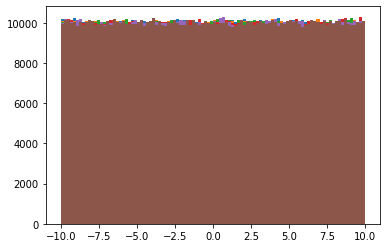

In [ ]:
%timeit plt.hist(np.random.uniform(low=-10, high=10, size=1_000_000).tolist(), bins=100)
%timeit fast_hist(np.random.uniform(low=-10, high=10, size=1_000_000).tolist(), bins=100)

Это достаточно странное поведение, объяснение которому находится после того, как мы отпрофилируем оба подхода: в то время как `fast_hist` работает за линейное время от количества входных данных, `plt.hist`, видимо, строит эвристическую гистограмму, потому что **суммарное** количество операций во **всём** вызове этой функции меньше, чем количество элементов во входных данных.

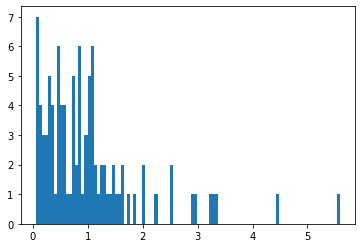

In [ ]:
%prun plt.hist(data, bins=100)

Профилировать `fast_hist` будем иначе, по строкам:

In [ ]:
!pip install line_profiler

     |████████████████████████████████| 63 kB 1.6 MB/s eta 0:00:011


In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f fast_hist fast_hist(data, bins=100, draw=False)